### Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, model_selection, preprocessing, base, metrics, datasets, pipeline

### Collecting, Analyzing and Visualizing data

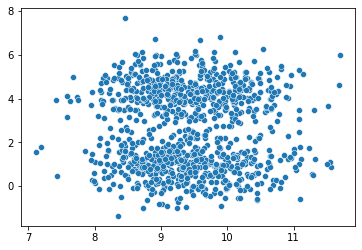

In [2]:
X, y = datasets.make_blobs(n_samples = 1000, n_features = 2, centers = 2, cluster_std = 0.8, random_state = 4)

sns.scatterplot(x = X[:, 0], y = X[:, 1])
plt.show()

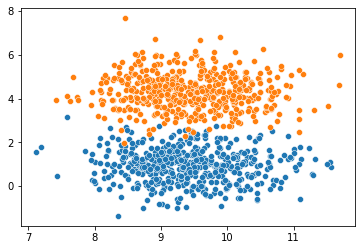

In [3]:
X0 = X[y == 0]
X1 = X[y == 1]

sns.scatterplot(x = X0[:, 0], y = X0[:, 1])
sns.scatterplot(x = X1[:, 0], y = X1[:, 1])
plt.show()

In [4]:
# Creating a data frame 

df = pd.DataFrame(X, columns = ['x' + str(num) for num in range(X.shape[1])])
df['target'] = y
df.head()

,x0,x1,target
0,9.257164,1.850909,0
1,8.403164,0.660324,0
2,9.227343,3.273707,1
3,9.208242,3.932019,1
4,8.180856,4.952575,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      1000 non-null   float64
 1   x1      1000 non-null   float64
 2   target  1000 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 19.7 KB


In [6]:
df.describe()

,x0,x1,target
count,1000.000000,1000.000000,1000.00000
mean,9.423243,2.636165,0.50000
std,0.754619,1.863690,0.50025
min,7.110269,-1.361929,0.00000
25%,8.891463,0.988704,0.00000
50%,9.381581,2.559668,0.50000
75%,9.934041,4.305516,1.00000
max,11.703988,7.669374,1.00000


In [7]:
corr_matrix = df.iloc[:, :-1].corr()

corr_matrix

,x0,x1
x0,1.000000,-0.005015
x1,-0.005015,1.000000


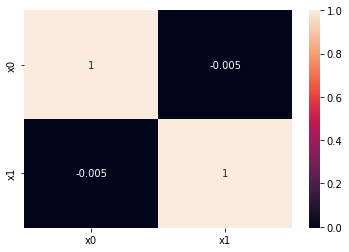

In [8]:
# Correlation Matrix (Pearson Correlation)

sns.heatmap(corr_matrix, annot = True)
plt.show()

In [9]:
df['target'].value_counts()

0    500
1    500
Name: target, dtype: int64

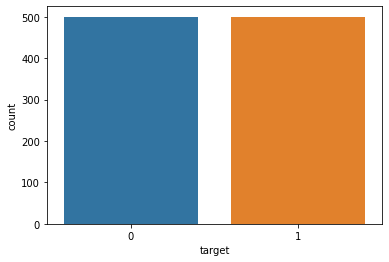

In [10]:
# Count Plot

sns.countplot(x = 'target', data = df)
plt.show()

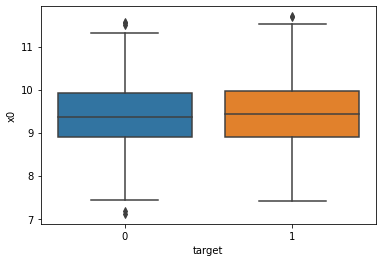

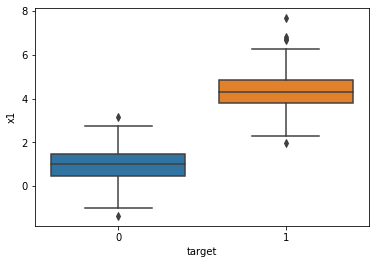

In [11]:
# Box Plot

for var in df.columns[:-1]:
    sns.boxplot(x = 'target', y = var, data = df)
    plt.show()

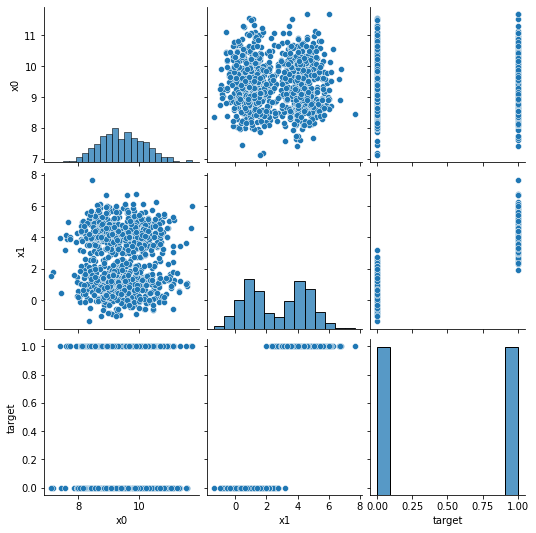

In [12]:
sns.pairplot(df)
plt.show()

### Data Preprocessing and Preparation

In [13]:
# Creating a Transformation Pipeline for Feature Scaling

p = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler())
])

In [14]:
# Stratified Splitting

strat_split = model_selection.StratifiedShuffleSplit(n_splits = 1, random_state = 3, test_size = 0.2)

for train_index, test_index in strat_split.split(df, df[['target']]):
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

In [15]:
print(train_set.shape, test_set.shape)

(800, 3) (200, 3)


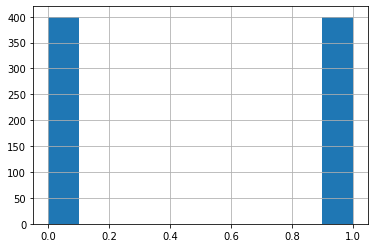

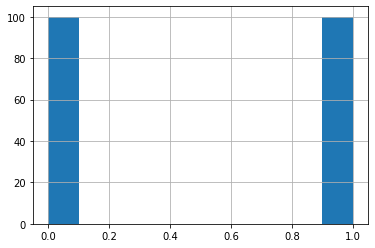

In [16]:
# Checking whether the samples are distributed uniformely

train_set['target'].hist()
plt.show()

test_set['target'].hist()
plt.show()

In [17]:
train_set_scaled = p.fit_transform(train_set.iloc[:, :-1])

train_set_scaled = np.c_[train_set_scaled, train_set.iloc[:, -1]]

In [18]:
X_train = train_set_scaled[:, :-1]
y_train = train_set['target'].values

### Training the Model and Evaluating it's Performance

In [58]:
# Implementing Linear SVC from scratch

class SVMClassifier:
    
    def __init__(self, n_iter = 1000, lr = 0.01, lam = 0.001):
        self.n_iter, self.lr = n_iter, lr
        self.lam = lam
        self.w = self.b = None
        
    def fit(self, X, y):
        n, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        y = np.where(y == 0, -1, 1)
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    dw = 2 * self.lam * self.w
                else:
                    dw = 2 * self.lam * self.w - np.dot(y[idx], x_i)
                    db = y[idx]
                self.w -= self.lr * dw
                self.b -= self.lr * db
        
    def predict(self, X):
        y_pred = ((np.dot(X, self.w) - self.b) >= 0).astype(int)
        return y_pred
    
    def score(self, X, y):
        y_pred = self.predict(X)
        acc = np.sum(y == y_pred) / len(y)
        return acc

In [75]:
# Training the classifier

clf = SVMClassifier(n_iter = 1000)

clf.fit(X_train, y_train)

In [76]:
y_train_pred = clf.predict(X_train)

print("Training Accuracy :", clf.score(X_train, y_train))

Training Accuracy : 0.98375


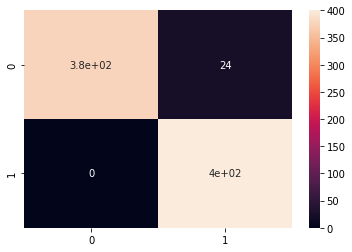

In [244]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [245]:
# Classification Metrics

tp, tn = conf_matrix[1][1], conf_matrix[0][0]
fp, fn = conf_matrix[0][1], conf_matrix[1][0]

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 0.9433962264150944
Recall or Sensitivity : 1.0
F1 Score : 0.970873786407767


In [246]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       400
           1       0.94      1.00      0.97       400

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



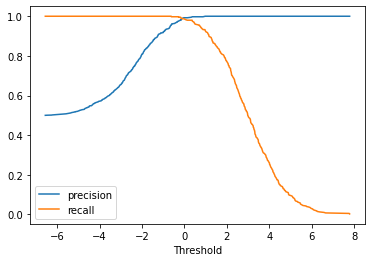

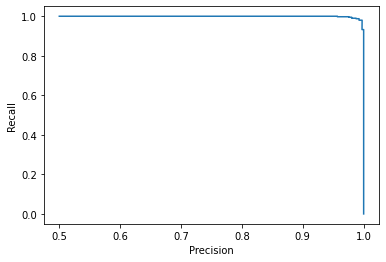

In [247]:
# Precision and Recall Curve

y_desc_scores = model_selection.cross_val_predict(svm.LinearSVC(), X_train, y_train, cv = 10, method = 'decision_function')

precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, y_desc_scores)

plt.xlabel("Threshold")
plt.plot(thresholds, precisions[:-1], label = 'precision')
plt.plot(thresholds, recalls[:-1], label = 'recall')
plt.legend()
plt.show()

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(precisions, recalls)
plt.show()

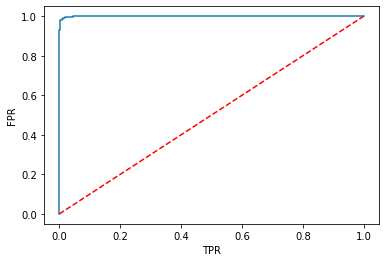

In [248]:
# Receiver Operator Characteristic Curve

tpr, fpr, thresholds = metrics.roc_curve(y_train, y_desc_scores)

plt.xlabel("TPR")
plt.ylabel("FPR")
plt.plot(tpr, fpr)
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [249]:
# Area Under ROC Curve (AUC)

auc = metrics.roc_auc_score(y_train, y_desc_scores)
print("Area Under ROC Curve :", auc)

Area Under ROC Curve : 0.99951875


### Validating the model

In [55]:
test_set_scaled = p.fit_transform(test_set.iloc[:, :-1])

test_set_scaled = np.c_[test_set_scaled, test_set.iloc[:, -1]]

In [56]:
X_test = test_set_scaled[:, :-1]
y_test = test_set_scaled[:, -1].astype(int)

In [72]:
y_test_pred = clf.predict(X_test)

test_acc = clf.score(X_test, y_test)

print("Test Accuracy :", test_acc)

Test Accuracy : 0.975


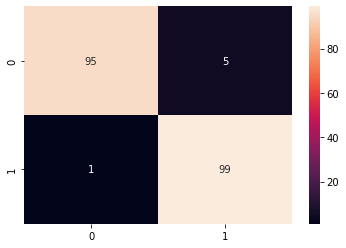

In [253]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [254]:
# Classification Metrics

tp, tn = conf_matrix[1][1], conf_matrix[0][0]
fp, fn = conf_matrix[0][1], conf_matrix[1][0]

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 0.9519230769230769
Recall or Sensitivity : 0.99
F1 Score : 0.9705882352941176


In [255]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       400
           1       0.94      1.00      0.97       400

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



#### Cross Validation

In [256]:
scores = model_selection.cross_val_score(svm.LinearSVC(), X_train, y_train, cv = 10)

print(np.sum(scores) / len(scores))

0.9887500000000001


In [73]:
m = svm.LinearSVC()

m.fit(X_train, y_train)

print(m.score(X_train, y_train))

print(m.score(X_test, y_test))

0.99125
0.99
